<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PNSPV/notebooky/keras_2020/cv02_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. cvičenie** - Linárna algebra s NumPy, Dopredný beh siete

V tomto notebooku si prejdeme operácie lineárnej algebry v NumPy. Tie potom využijeme aby sme naprogramovali plne prepojenú sieť.

#Lineárna Algebra s NumPy

Na implementáciu základnej plne prepojenej siete budeme potrebovať maticové násobenie. V skutočnosti budeme násobiť tenzory, ale najprv si precvičíme násobenie matíc.

## Maticové násobenie
Najdôležitejšia operácia, ktorú budeme potrebovať je maticové násobenie. Najprv definícia:

Nech $\mathbf{A} \in \mathbb{R}^{m\times n}, \mathbf{B} \in \mathbb{R}^{n \times l}, \mathbf{C} \in \mathbb{R}^{m \times l} $ potom $\mathbf{A}\mathbf{B} = \mathbf{C} \iff (\forall i \in \hat{m})(\forall j \in \hat{l})(c_{i,j} = \sum_{k=1}^{n} a_{i,k} \cdot b_{k,j})$ 

K definícii je dobré si pripomenúť, že prvý index označuje riadok a druhý index označuje stĺpec.

### Úloha 1 (Na tabuľu)

Spočítajte súčiny $\mathbf{A}\mathbf{B}$, $\mathbf{B}\mathbf{C}$, $\mathbf{C}\mathbf{B}$

$\mathbf{A} = \begin{bmatrix} 
3 & 5 & -1 \\
2 & -4 & 2
\end{bmatrix}$

$\mathbf{B} = \begin{bmatrix} 
5 & 2 & 1 \\
-6 & 5 & 2 \\
3 & 4 & -1
\end{bmatrix}$

$\mathbf{C} = \begin{bmatrix} 
4 & -4 & 3 \\
-6 & -3 & 4 \\
-1 & 1 & 0
\end{bmatrix}$

V numpy násobíme matice pomocou príkazu np.matmul(a,b), alebo pomocou operátora @. Dá sa použiť aj np.dot. Rozdiel medzi multiply a dot je v broadcastingu. Otestujte aj súčin $\mathbf{BC}$ a $\mathbf{CB}$

*Pozn:* Vektory môžeme považovať za matice s jednou dimenziou jedna. Podľa toho či je stĺpcový, alebo riadkový. Formálne to mení možnosti násobenia. Toto ale v NumPy nieje tak vždy. Pri násobení sa tak arrays ktoré majú len jeden rád, tj. len(np.shape) == 1 upravia podľa toho čo sa viac hodí, či riadkový, alebo stĺpcový vektor.

In [0]:
import numpy as np
a = np.array([[3,5,-1],[2,-4,2]])
b = np.array([[5,2,1],[-6,5,2],[3,4,-1]])
print(np.matmul(a,b))
d = a @ b
print(d)
v = np.array([10,20,30])
print(v.shape)
u = np.array([5,25])
print(u.shape)
print(a @ v)
print(u @ a)


[[-18  27  14]
 [ 40  -8  -8]]
[[-18  27  14]
 [ 40  -8  -8]]
(3,)
(2,)
[100   0]
[ 65 -75  45]


V prípade, že máme jeden tenzor vyššieho rádu ako 2, tak matmul ich bude brať ako zoznam matíc. Ak potrebujeme robiť exotickejšie operácie, tak môžeme použiť príkaz np.einsum.

## Skalárne násobenie

Skalárom môžeme jednoducho násobiť matícu. To sa robí pomocou np.multiply, alebo operátorom *. Ak nenásobíme skalárom ale tenzorom, tak dôjde k násobeniu po elementoch s príšlušným broadcastingom. 

In [0]:
print(a * d)
print(5 * a)

[[-54 135 -14]
 [ 80  32 -16]]
[[ 15  25  -5]
 [ 10 -20  10]]


## Transponované matice

Definícia: Nech $\mathbf{A} \in \mathbb{R}^{m,n}$ potom $\mathbf{A}^T \in \mathbb{R}^{n,m}$ je jej transponovaná matica $\iff (\forall i \in \hat{m})(\forall j \in \hat{n})(a_{i,j} = a^T_{j,i})$ 

V numpy jednoducho voláme metódu np.array .T, alternatívne možeme použiť funkciu np.transpose. Opäť platí, že rovnako môžeme postupovať aj v prípade vektorov zapísaných ako matice.


In [0]:
print(a.T)
print(np.transpose(a))

r = np.array([[100,10,1]])
print(r.shape)

c = np.array([[3],[7],[8]])
print(c.shape)

print(a @ c)
print(a @ r.T)



[[ 3  2]
 [ 5 -4]
 [-1  2]]
[[ 3  2]
 [ 5 -4]
 [-1  2]]
(1, 3)
(3, 1)
[[36]
 [-6]]
[[349]
 [162]]


# Plne prepojená neurónová sieť
Neurónová sieť je biologicky inšpirovaný model pre realizáciu výpočtov rôznych funkcií. Dnes ju budeme využívať na ako klasifikátor. 

Sieť obecne modelujeme ako orientovaný graf s ohodnotenými hranami ktorého vrcholy sú tzv. neuróny. Každý neurón má svoju aktiváciu, ktorá sa počíta na základe aktivácii neurónov s ktorými je prepojený. Táto aktivácia zas ovplivňuje ďalšie neuróny. Najobecnejšie tak môžeme popísať sieť ako:
$$a_p = f \left( \sum_{q \in p_{in}} w_{p,q} a_q + b_p \right) = f\left(z_p\right),$$

kde $a_p$ je aktivácia daného vrcholu, $w_{p,q}$ je váha vrcholu $q$ pre vrchol $p$, $b_p$ je prah vrcholu $p$, $f$ je aktivačná funckia, $z_p$ je zjednodušený zápis vstupu aktivačnej funkcie. V takomto zápise je však možné aby boli neuróny prepojené cyklicky, čo nechceme. Takisto nechceme, aby bola štruktúra siete komplikovaná. Preto zavedieme tzv. plne prepojenú neurónovú sieť, tiež označovaný ako Multi-Layer-Perceptron. Táto organizácia spočíva v tom, že každý neurón je v nejakej vrstve a každý neurón v jednej vrstve je prepojený s každým z predchádzajúcej.

![Plne prepojená sieť](https://raw.githubusercontent.com/kocurvik/edu/master/PNSPV/supplementary/ntb_images/NN1.jpg)

Vyhodnotenie siete potom môžeme zapísať ako:

$$a_j^l = f \left( \sum_{k} a_k^{l-1} a_{k,j}^l + b_j^l \right) = f \left(z_j^l \right),$$

resp. vektorovo:

$$a^l = f \left( a^{l-1}w^l + b^l \right) =  f \left(z^l \right),$$

kde $a^l$ je **riadkový** vektor aktivácií, $w^l$ je matica váh tvaru $size(l-1) \times size(l)$, $a_l$ je **riadkový** vektor prahov, $f$ je skalárna aktivačná funkcia, ktorá je vo vektorovom prípade aplikovaná po elementoch, $z_l$ je taktiež riadkový vektor, ktorý použijeme na zjednodušenie výrazov. Horný index pri každom výraze značí, ku ktorej vrstve daný objekt partrí.

Pre lepšiu predstavu o indexácií viď obrázky:

![Indexy aktivácie a prahu](https://raw.githubusercontent.com/kocurvik/edu/master/PNSPV/supplementary/ntb_images/activation_bias.jpg)
![Indexy váh](https://raw.githubusercontent.com/kocurvik/edu/master/PNSPV/supplementary/ntb_images/weight.jpg)

*Pozn.:* Vektory by mohli byť aj stĺpcové (a matica tak transponovaná a násobenie v opačnom poradí), ale to by nám v NumPy skomplikovalo prácu kvôli broadcastingu.







### Aktivačné funkcie

Môžeme použiť rôzne aktivačné funkcie. Dnes ostaneme pri sigmoide, ale nabudúce si implementujeme aj ďalšie.

1. Sigmoid: $f(z) = \frac{1}{1 + e^{-z}}$
2. Tanh: $f(z) = tanh(z)$
3. ReLU: $f(z) = max(x,0)$
4. SoftPlus: $f(z) = ln(1 + e^z)$
5. LeakyReLU: $f(z) = max(x,ax), a \le 1$


### Interpretácia poslednej vrstvy

Zameriame sa na úlohu klasifikácie. Preto budeme interpretovať poslednú vrstvu v tomto zmysle. Ak chcem klasifikovať len do dvoch tried, tak nám stačí jeden neurón so sigmoidom. Ak je jeho hodnota menšia ako 0.5 klasifikujeme objekt ako prvú triedu a inak ako druhú.

Pri viacerých $n \gt 2$ triedach potrebujeme viacero neurónov môžeme použiť pravidlo: $k = {argmax}_{i \in \hat{n}}(a_i^L(x))$, kde $L$ je počet vrstiev, $x$ je vstupný vektor $n$ je počet tried a $k$ je trieda ktorú klasifikátor určil.

Trocha sofistikvanejší postup je použitie. Tzv. softmax vrstvy na konci namiesto bežnej aktivácie. $P(k|x) = \frac{e^{z^L_k(x)}}{\sum_{i \in \hat n} e^{z^L_i(x)}}$, kde $P(k|x)$ je pravdepodobnosť, že pre vstup $x$ je správna trieda $k$.


## Trénovanie

Model je síce pekný, ale je nutné nájsť také aktivácie aby robil to, čo chceme. V našom prípade je to klasifikácia do $n$ tried. Na trénovanie budeme potrebovať trénovacie dáta. Teda páry $\left(x, y\right)$, kde $x$ je vstupný vektor a $y$ je výstupný vektor označujúci správnu triedu. Aby sa nám to hodilo do interpretácie poslednej vrstvy, tak $y$ bude vektor, ktorý bude mať na $k$-tom mieste jednotku a všade inde nuly. Toto je tzv. **one-hot** kódovanie.

### Cenová funkcia

Trénovanie je podobné optimalizácii. Chceme nájsť také parametre siete (v našom prípade matice $w$ a vektory $b$), ktoré budú fungovať čo najlepšie pre náš problém. To sa budeme snažiť docieliť tým že budeme optimalizovať hodnotu tzv. ceny (loss function, cost function). Ideálne platí, že cím vyššia cena na nejakej množine, tým horšie na nej naša sieť funguje. Zároveň chceme aby bola cena pekne diferencovateľná. Dnes použijeme cenové funkcie pre $N$ párov $\left(x^i, y^i\right)$:

1. MSE: $C = \frac{1}{N} \sum_i ||a^L(x^i) - y^i||_2^2$, kde $||v||_2$ je L-2 norma vektoru $v$.
2. Cross-Entropy:  $C = -\frac{1}{N} \sum_{i,j} y_j^i ln\left(a_j^L(x)\right) + \left(1-y_j^i\right) ln\left(1 - a_i^L(x) \right)$
3. CE + Softmax: $C = \frac{1}{N} ln(z_y^L(x))$, kde $z_y^L(x)$ je ten element vektoru $z^L(x)$, pre ktorý je trieda správne. 


### Gradientný zostup

Na optimalizáciu použijeme jednoduché pravidlo gradientného zostupu s krokom $\eta$ pre parameter $p$ a cenovú funkciu $C$.

$$p := p - \eta \frac{\partial C}{\partial p}$$



### SGD

Na každý krok pri trénovaní vždy použijeme náhodnú podmnožinu z trénovacej množiny. Na ďalší krok ďalšiu atď. Toto má výhody v tom, že vnášame do procesu šum, ktorý nás vie dostať z lokálnych miním. Takisto miesta v parametrickom priestore kam sa algoritmus dostane majú často lepšie vlastnosti, čo sa týka generalizácie ako čistá optimalizácia. Navyše tým šetríme miesto v pamäti, čo je jedna zo základných.

Tento prístup sa volá **stochastic gradient descent (SGD)**.

*Pozn.:* Výberom minibatchu vlastne approximujeme priestor funkciu $C$ pre celú trénovaciu množinu. "Chyba" tejto aproximácie klesá približne $\sim \frac{1}{\sqrt{M}}$, kde $M$ je veľkosť minibatchu. Preto nieje úplne vhodné používať veľký minibatch, aj keď to pamäť dovoluje.

### Výpočet parciálnych derivácii
Teraz si odvodíme postup ako vypočítať analyticky parciálne derivácie pre našu plne prepojenú sieť.

Najprv si zavedieme pomocnú deriváciu.

$ d_i^l = \frac{\partial C}{\partial z_i^l}$

V závislosti na výbere $C$ platí, značka $\odot$ značí násobenie po elementoch (Hadamardov súčin)

pre MSE: $d_i^L = (a_i^L - y_i) \cdot f^{'} (z_i^L)$, 

pre CE: $d_i^L = (a_i^L - y_i)$

Vektorovo MSE: $d_i^L = (a^L - y) \odot f^{'} (z^L)$

Vektorovo CE: $d^L = a^L - y$

Na základe $d^{l+1}$ môžeme určiť $d^l$. Tento postup je tzv. **backpropagation**, keďže deriváciu (gradient) propagujeme v sieti opačným smerom ako pri doprednom výpočte.

$ d^l = \left(d^{l+1} \left( w^{l+1} \right)^T\right) \odot f^{'}(z^l)$

Dôkaz:

$z_j^{l+1} = \sum_k \left( f \left( z^l_k\right) w_{kj}^{l+1} \right) + b_j^{l+1}$

$\frac{\partial z_j^{l+1}}{\partial z_k^l} = f^{'} \left( z^l_k\right) w_{kj}^{l+1}$

$d_k^l = \frac{\partial C}{\partial z_k^l} = \sum_j \frac{\partial C}{\partial z_j^{l+1}} \frac{\partial z_j^{l+1}}{\partial z_k^l} = \sum_j d_j^{l+1} f^{'} \left( z^l_k\right) w_{kj}^l$

Pre parametre platí:

$\frac{\partial C}{\partial b_j^l} = d_j^l$

$\frac{\partial C}{\partial w_{kj}^l} = d_j^l a_k^{l-1}$

Vektorovo:

$\frac{\partial C}{\partial b^l} = d^l$

$\frac{\partial C}{\partial w_{}^l} = (a^{l-1})^T d^l $

Dôkaz:

$z_j^l = \sum_k a_k^{l-1} w_{kj}^l + b_j^l$

$\frac{\partial C}{\partial b_j^l} = \sum_k \frac{\partial C}{\partial z_k^l}\frac{\partial z_k^l}{\partial b_j^l} = \sum_k \delta_{kj} d_k^l = d_j^l$

$\frac{\partial C}{\partial w_{kj}^l} = \sum_p \frac{\partial C}{\partial z_p^l}\frac{\partial z_p^l}{\partial w_{kj}^l} = \sum_p d_p^l \delta_{pj} a_k^{l-1} = d_j^l a_k^{l-1}$  

kde $\delta_{jk} = 1$ ak $j = k$, inak $ 0$.

### Algoritmus
Jeden krok algoritmu SGD potom vyzerá následovne
1. Realizujeme dopredný výpočet - pamätáme si $z^l$ a $a^l$.
2. Vypočitame $\delta^L$ podľa cenovej funkcie
3. Spätne propagujeme chybu $\delta^l$ pomocou backpropagation pravidla.
4. Vypočítame parciálne derivácie podľa rovníc z predchádzajúceho bloku.
5. Opakujeme pre celý minibatch, derivácie spriemerujeme a updatneme parametre podľa gradientného zostupu.
  
**Pozor:** je nutné ešte nejako nainicializovať váhy. Ak ich nainicializujeme narovnako, tak derivácie pre jednotlivé vrstvy budú vždy rovnaké a tak sa sieť ani nemôže naučit komplikovanejšie reprezentácie. Tj. je to ako sieť kde v každej vrstve je len jeden neurón.

## Implementácia

V nasledujúcom kóde je implementácia základnej štruktúry kódu. Pre jednoduchú plne prepojenú sieť. V kóde budete musieť doplniť veci v jednotlivých úlohách. K úlohám je aj kód, ktorý Vám pomôže overiť či ste správne doimplementovali časť riešenia.

In [0]:
import numpy as np

def sigmoid(z):
    # vráti hodnotu sigmoidu
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    # vráti gradient sigmoidu
    return sigmoid(z)*(1-sigmoid(z))


# def one_hot(j):
#     # vráti one-hot zakodovaný vektor
#     e = np.zeros((10, 1))
#     e[j] = 1.0
#     return e

def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

class Network():
    def __init__(self, arg):
        if isinstance(arg, str):
        
            self.load(arg)
        else:
            if len(arg) < 2:
                raise ValueError("Sizes must be at least 2!")

            self.w_list = []
            self.b_list = []
            for i in range(1, len(arg)):
                self.w_list.append(np.random.randn(arg[i - 1], arg[i]))
                self.b_list.append(0.1 * np.ones((arg[i])))

    def save(self, filename):
        dict = np.array([self.w_list, self.b_list])
        np.save(filename, dict)

    def load(self, filename):
        d = np.load(filename, allow_pickle=True)
        self.w_list = d[0].tolist()
        self.b_list = d[1].tolist()

    def fwd(self, a):
        for b, w in zip(self.b_list, self.w_list):
            a = sigmoid(np.dot(a, w)+b)
        return a

    def _step(self, X, y, batch_size, eta):
        new_w_list = [np.empty_like(w) for w in self.w_list]
        new_b_list = [np.empty_like(b) for b in self.b_list]
        z_list = []
        a_list = [X]
        for i in range(len(self.w_list)):
            z_list.append(np.matmul(a_list[i], self.w_list[i]))
            a_list.append(sigmoid(z_list[i]))

        d_list = [[] for _ in z_list]
        err = np.sum((a_list[-1] - y)**2) / batch_size
        # d_list[-1] = (a_list[-1] - y)*sigmoid_prime(z_list[-1])
        d_list[-1] = a_list[-1] - y

        new_w_list[-1] = self.w_list[-1] - (eta / batch_size) * np.matmul(a_list[-2].T, d_list[-1])
        new_b_list[-1] = self.b_list[-1] - (eta / batch_size) * np.sum(d_list[-1], axis= 0)
        for i in range(2, len(z_list)+1):
            d_list[-i] = (np.matmul(d_list[-i+1], self.w_list[-i+1].T))*sigmoid_prime(z_list[-i])
            new_w_list[-i] = self.w_list[-i] - (eta / batch_size) * np.matmul(a_list[-i-1].T, d_list[-i])
            new_b_list[-i] = self.b_list[-i] - (eta / batch_size) * np.sum(d_list[-i], axis=0)
        self.w_list = new_w_list
        self.b_list = new_b_list
        return err

    def eval(self, X, y):
        out = self.fwd(X)
        err = np.mean((out - y)**2)
        out_best = np.argmax(out, axis=-1)
        y_best = np.argmax(y, axis=-1)
        acc = np.sum(np.where(out_best == y_best, 1, 0))/y.shape[0]
        return acc, err

    def sgd(self, X, y, val_X, val_y, epochs, steps, batch_size, eta):
        for epoch in range(epochs):
            err_tot = 0
            for step in range(steps):
                batch_mask = np.random.choice(X.shape[0], batch_size)
                batch_X = X[batch_mask,:]
                batch_y = y[batch_mask,:]
                err = self._step(batch_X, batch_y, batch_size, eta)
                if step == 0:
                    err_tot = err
                else:
                    err_tot = 0.1 * err + 0.9 * err_tot
                print("At step: {}, running average training error: {}".format(step, err_tot))

            acc, err = self.eval(val_X, val_y)
            print("At Epoch {}, validation error: {}, validation accuracy {}".format(epoch, err, acc))

### Úloha 2

Doimplementujte funkciu sigmoid, ktorá vráti výsledok funkcie sigmoid po elementoch pre každý vstupný tenzor.

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Takisto doimplementujte aj deriváciu

$$\sigma (z)^{'} = \sigma (z)\left(1 - \sigma (z) \right)$$



In [0]:
assert(sigmoid(0) == 0.5)
assert(sigmoid(50) > 1.0-1e-10)
assert(sigmoid(-50) <= 2e-22)
assert((sigmoid(np.array([10, 20]))==np.array([sigmoid(10), sigmoid(20)])).all())
assert(sigmoid_prime(0) == 0.25)
assert(sigmoid_prime(-50) > 0 )
assert(sigmoid_prime(30) > 0 )

### Úloha 3

Pred treťou úlohou načítame mnist dataset a zobrazíme si jeden obrázok. Je dosť možné, že to chvílu potrvá.

In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X = mnist.data.astype('float32')/255
y = mnist.target.astype('int64')

5


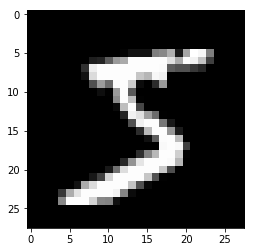

In [0]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(X[0,],(28,28)), cmap='gray')
print(y[0])

Doimplementujte metódu fwd. V prvom teste sa testuje dimenzia výstupu a v druhuom sa stihane predtrénovaná sieť a spustí sa na obrázkoch z datasetu MNIST.

In [0]:
net = Network([28*28,30,20,10])
out = net.fwd(np.random.randn(32,784))
assert(out.shape == (32,10))
print("Prvý test prešiel")

Prvý test prešiel


In [0]:
!wget https://github.com/kocurvik/edu/raw/master/PNNPPV/supplementary/test_net.npy

--2019-10-02 12:06:19--  https://github.com/kocurvik/edu/raw/master/PNNPPV/supplementary/test_net.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/test_net.npy [following]
--2019-10-02 12:06:20--  https://raw.githubusercontent.com/kocurvik/edu/master/PNNPPV/supplementary/test_net.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304267 (297K) [application/octet-stream]
Saving to: ‘test_net.npy’

test_net.npy        100%[===================>] 297.14K  --.-KB/s    in 0.03s   

2019-10-02 12:06:20 (10.6 MB/s) - ‘test_net.npy’ saved [304267/304267]



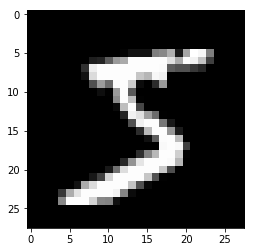

[9.37229037e-04 2.66838142e-04 2.75842143e-05 9.41889344e-03
 2.84101542e-08 3.63257568e-01 1.62064850e-07 8.06202488e-05
 7.02270024e-04 6.57032697e-04]
5


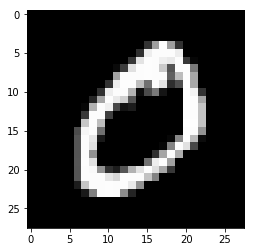

[9.94378188e-01 4.89519245e-07 3.28816149e-05 8.06781030e-05
 6.55497717e-06 4.25255977e-05 1.82384777e-04 7.61480364e-04
 2.06510936e-05 1.62541578e-03]
0


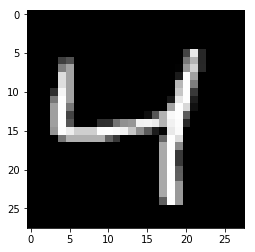

[1.53046899e-05 1.98120978e-04 1.47761151e-03 6.18961861e-05
 5.35841113e-01 1.93294785e-06 6.89669687e-06 3.71849632e-02
 4.93958997e-05 2.59638688e-02]
4
Druhý test prešiel!


In [0]:
net = Network("test_net.npy")

R = net.fwd(X[0:3,:])

correct_list = [5,0,4]

for i in range(3):
  plt.imshow(np.reshape(X[i,:],(28,28)), cmap = 'gray')
  plt.show()
  print(R[i])
  print(np.argmax(R[i,:]))
  assert(np.argmax(R[i]) == correct_list[i])
  
print("Druhý test prešiel!")

### Úloha 4 
Doimplementujte metódu _step

Ktorá výkoná krok SGD pre MSE, alebo CE cenovú funkciu. Túto metódu nebude testovať priamo, ale skúsime je apllikovať na trénovanie. Tieto parametre by mali fungovať aspoň tak, že model sa bude zlepšovať na validačnej množine.

In [0]:
train_X = X[:50000, :]
train_y = get_one_hot(y[:50000], 10)


val_X = X[50000:60000,:]
val_y = get_one_hot(y[50000:60000],10)
#
net = Network([28*28,30,20,10])
net.sgd(train_X, train_y, val_X, val_y, 10, 10000, 32, 0.01)
net.sgd(train_X, train_y, val_X, val_y, 10, 10000, 32, 0.03)
net.sgd(train_X, train_y, val_X, val_y, 10, 10000, 32, 0.001)
net.save("net.npy")

At step: 0 training error: 5.102115440233531
At step: 1 training error: 5.081094806350565
At step: 2 training error: 5.070079849369308
At step: 3 training error: 5.037166941435059
At step: 4 training error: 4.9819107610229665
At step: 5 training error: 4.937761992739605
At step: 6 training error: 4.937664792774155
At step: 7 training error: 4.907921698892566
At step: 8 training error: 4.8744858531654005
At step: 9 training error: 4.8557840587178935
At step: 10 training error: 4.8021571317660765
At step: 11 training error: 4.768314249275084
At step: 12 training error: 4.727487011088771
At step: 13 training error: 4.684205913073173
At step: 14 training error: 4.627842432121145
At step: 15 training error: 4.605708242610705
At step: 16 training error: 4.580204900235965
At step: 17 training error: 4.524292091910626
At step: 18 training error: 4.505084419911237
At step: 19 training error: 4.471033629142642
At step: 20 training error: 4.427585211647423
At step: 21 training error: 4.3651863835

KeyboardInterrupt: ignored

Môžeme si sieť aj otestovať!

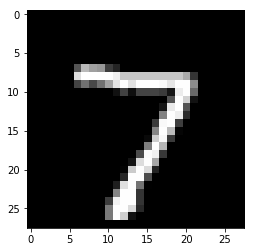

[0.12523084 0.00301107 0.00462281 0.00622856 0.01245105 0.03782456
 0.00170998 0.77672491 0.00525389 0.0393361 ]
7


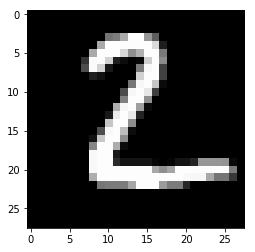

[1.20001553e-01 1.96503987e-02 4.58400595e-01 1.57629744e-01
 4.41331624e-04 3.10716063e-02 3.76261724e-02 6.81080659e-04
 3.38357294e-01 7.09279057e-04]
2


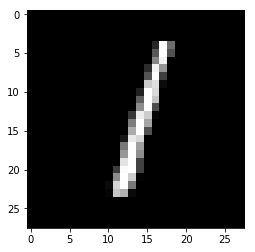

[0.00122257 0.86629252 0.03101753 0.01315321 0.04036226 0.00153139
 0.01156872 0.01348759 0.01669565 0.00615378]
1


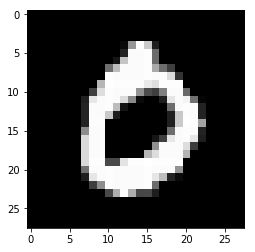

[8.53642695e-01 1.73429039e-04 4.34650021e-02 1.41514665e-02
 1.10947576e-02 7.95487282e-02 5.01644949e-02 1.54682001e-02
 1.04895016e-02 7.79730643e-03]
0


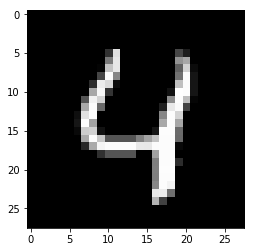

[0.00545605 0.0006034  0.00276516 0.01004959 0.4887804  0.01840578
 0.05849188 0.00603938 0.0060543  0.28962314]
4


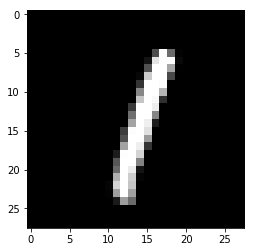

[6.50422587e-04 8.75325848e-01 1.18020688e-02 1.00696660e-02
 2.16820404e-02 1.52270246e-03 2.02840305e-02 3.69091311e-03
 1.71153156e-02 8.09528338e-03]
1


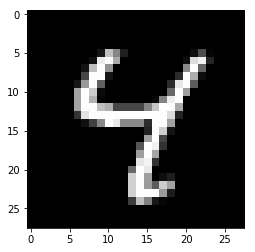

[0.00320795 0.0018251  0.00421562 0.00997912 0.44808536 0.02493531
 0.0724309  0.05923979 0.0054142  0.22613235]
4


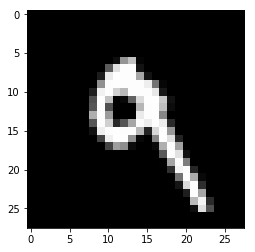

[0.0041872  0.00440536 0.00153395 0.00484204 0.18990073 0.06306452
 0.01050015 0.02571359 0.01209636 0.13732852]
4


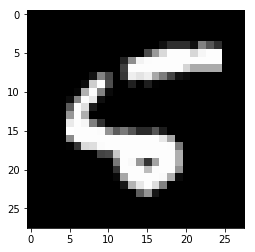

[0.12265284 0.00225114 0.03634636 0.00428626 0.18239828 0.01213656
 0.06687244 0.00284248 0.01534639 0.02162131]
4


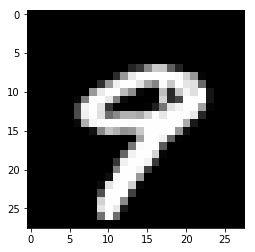

[0.00593848 0.00924074 0.00549288 0.00483596 0.01191088 0.00864117
 0.04421318 0.39564688 0.01625643 0.09187523]
7


In [0]:
R = net.fwd(X[60000:60010,:])

for i in range(10):
  plt.imshow(np.reshape(X[60000 + i,:],(28,28)), cmap = 'gray')
  plt.show()
  print(R[i])
  print(np.argmax(R[i,:]))

In [0]:
!pwd


/content
